# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the datasets

In [2]:
data1_path = "data1.csv"
data2_path = "data2.csv"
data1 = pd.read_csv(data1_path, header=None, names=['x'])
data2 = pd.read_csv(data2_path, header=None, names=['x'])

In [3]:
data1

,x
0,0.300000
1,0.300000
2,-0.114800
3,-0.035121
4,-0.258700
...,...
995,-0.097027
996,0.138040
997,0.515600
998,-0.594770


In [4]:
data2

,x
0,0.300000
1,0.300000
2,-0.621240
3,-0.238200
4,0.533110
...,...
995,0.174840
996,-0.276450
997,-0.170960
998,0.147170


# Data Preparation

## Construct the lagged series x(n−1) and x(n−2) by shifting our original series by 1 and 2 positions.
## Ensure both lagged series have the same length of 1000 by padding with zeros at the start.

In [5]:
def create_lagged_series(data):
    # Original series x(n)
    x_n = data['x']
    
    # Lag 1 series x(n-1), pad the start with one zero
    x_n_minus_1 = np.concatenate(([0], x_n[:-1]))
    
    # Lag 2 series x(n-2), pad the start with two zeros
    x_n_minus_2 = np.concatenate(([0, 0], x_n[:-2]))
    
    # Create a DataFrame with original and lagged series
    lagged_df = pd.DataFrame({
        'x(n)': x_n,
        'x(n-1)': x_n_minus_1,
        'x(n-2)': x_n_minus_2
    })
    
    return lagged_df

# Apply the function to both datasets
lagged_data1 = create_lagged_series(data1)
lagged_data2 = create_lagged_series(data2)

In [6]:
lagged_data1

,x(n),x(n-1),x(n-2)
0,0.300000,0.000000,0.000000
1,0.300000,0.300000,0.000000
2,-0.114800,0.300000,0.300000
3,-0.035121,-0.114800,0.300000
4,-0.258700,-0.035121,-0.114800
...,...,...,...
995,-0.097027,-0.250550,0.088909
996,0.138040,-0.097027,-0.250550
997,0.515600,0.138040,-0.097027
998,-0.594770,0.515600,0.138040


In [115]:
lagged_data2

,x(n),x(n-1),x(n-2)
0,0.300000,0.00000,0.00000
1,0.300000,0.30000,0.00000
2,-0.621240,0.30000,0.30000
3,-0.238200,-0.62124,0.30000
4,0.533110,-0.23820,-0.62124
...,...,...,...
995,0.174840,0.24599,-0.40318
996,-0.276450,0.17484,0.24599
997,-0.170960,-0.27645,0.17484
998,0.147170,-0.17096,-0.27645


# Define the target variable Y and the features matrix X

In [7]:
X_train_data1 = lagged_data1.iloc[:, 1:]
y_train_data1 = lagged_data1.iloc[:, 0]

X_train_data2 = lagged_data2.iloc[:, 1:]
y_train_data2 = lagged_data2.iloc[:, 0]

In [8]:
X_train_data1

,x(n-1),x(n-2)
0,0.000000,0.000000
1,0.300000,0.000000
2,0.300000,0.300000
3,-0.114800,0.300000
4,-0.035121,-0.114800
...,...,...
995,-0.250550,0.088909
996,-0.097027,-0.250550
997,0.138040,-0.097027
998,0.515600,0.138040


In [9]:
y_train_data1

0      0.300000
1      0.300000
2     -0.114800
3     -0.035121
4     -0.258700
         ...   
995   -0.097027
996    0.138040
997    0.515600
998   -0.594770
999    0.134890
Name: x(n), Length: 1000, dtype: float64

# Implementing Regular Gradient Descent for the AR(2) model

In [10]:
def regular_gradient_descent(X, Y, learning_rate=0.01, epochs=1000, tolerance=1e-6):
    
    N = len(Y)  # Number of observations
    
    # Initialize weights w1 and w2
    w1, w2 = 0.0, 0.0

    # To track the history of the loss function
    cost_history = []

    # Gradient Descent Iterations
    for epoch in range(epochs):
        # Predict the values using the current weights
        Y_pred = -w1 * X['x(n-1)'] - w2 * X['x(n-2)']

        # Calculate the Mean Squared Error (MSE)
        error = Y_pred - Y
        mse = (1 / N) * np.sum(error ** 2)
        cost_history.append(mse)

        # Compute the gradients
        grad_w1 = (2 / N) * np.sum(error * (-X['x(n-1)']))
        grad_w2 = (2 / N) * np.sum(error * (-X['x(n-2)']))

        # Update weights
        w1_new = w1 - learning_rate * grad_w1
        w2_new = w2 - learning_rate * grad_w2

        # Check for convergence (if changes in weights are smaller than tolerance, stop)
        if np.abs(w1_new - w1) < tolerance and np.abs(w2_new - w2) < tolerance:
            print(f"Converged after {epoch} iterations.")
            break

        w1, w2 = w1_new, w2_new

    return w1, w2, cost_history

# Implementing Stochastic Gradient Descent for the AR(2) model

In [11]:
def stochastic_gradient_descent(X, Y, learning_rate=0.01, epochs=1000, tolerance=1e-6):

    N = len(Y)  # Number of observations
    
    # Initialize weights w1 and w2
    w1, w2 = 0.0, 0.0

    # To track the history of the loss function
    cost_history = []

    # Stochastic Gradient Descent Iterations
    for epoch in range(epochs):
        
        # Shuffle the data to ensure random sampling in each epoch
        shuffled_indices = np.random.permutation(N)
        X_shuffled = X.iloc[shuffled_indices].reset_index(drop=True)
        Y_shuffled = Y.iloc[shuffled_indices].reset_index(drop=True)
        
        # Loop through each data point
        for i in range(N):
            x_n1 = X_shuffled.at[i, 'x(n-1)']
            x_n2 = X_shuffled.at[i, 'x(n-2)']
            y_actual = Y_shuffled[i]
            
            # Predict the value using current weights
            y_pred = -w1 * x_n1 - w2 * x_n2
            
            # Calculate the error
            error = y_pred - y_actual
            
            # Compute the gradients for this single data point
            grad_w1 = 2 * error * (-x_n1)
            grad_w2 = 2 * error * (-x_n2)
            
            # Update weights
            w1 = w1 - learning_rate * grad_w1
            w2 = w2 - learning_rate * grad_w2

        # Calculate MSE for the epoch to track performance
        Y_pred_epoch = -w1 * X['x(n-1)'] - w2 * X['x(n-2)']
        mse_epoch = (1 / N) * np.sum((Y_pred_epoch - Y) ** 2)
        cost_history.append(mse_epoch)

        # Check for convergence based on changes in the MSE
        if epoch > 0 and np.abs(cost_history[-2] - cost_history[-1]) < tolerance:
            print(f"Converged after {epoch} epochs.")
            break

    return w1, w2, cost_history

# Apply AR(2) model

In [12]:
w1_data1, w2_data1, cost_history_data1 = regular_gradient_descent(X_train_data1, y_train_data1, learning_rate=0.01, epochs=1000, tolerance=1e-6)
w1_data2, w2_data2, cost_history_data2 = regular_gradient_descent(X_train_data2, y_train_data2, learning_rate=0.01, epochs=1000, tolerance=1e-6)

w1_sgd_data1, w2_sgd_data1, cost_history_sgd_data1 = stochastic_gradient_descent(X_train_data1, y_train_data1, learning_rate=0.01, epochs=1000, tolerance=1e-6)
w1_sgd_data2, w2_sgd_data2, cost_history_sgd_data2 = stochastic_gradient_descent(X_train_data2, y_train_data2, learning_rate=0.01, epochs=1000, tolerance=1e-6)

Converged after 16 epochs.
Converged after 28 epochs.


In [13]:
print(f"Optimized weights (Regular Gradient Descent) for Data1: w1 = {w1_data1}, w2 = {w2_data1}")
print(f"Optimized weights (Regular Gradient Descent) for Data2: w1 = {w1_data2}, w2 = {w2_data2}")

Optimized weights (Regular Gradient Descent) for Data1: w1 = 0.19695951443184007, w2 = -0.025663267731120078
Optimized weights (Regular Gradient Descent) for Data2: w1 = 0.05363797895475252, w2 = 0.6756404705283419


In [14]:
print(f"Optimized weights (Stochastic Gradient Descent) for Data1: w1 = {w1_sgd_data1}, w2 = {w2_sgd_data1}")
print(f"Optimized weights (Stochastic Gradient Descent) for Data2: w1 = {w1_sgd_data2}, w2 = {w2_sgd_data2}")

Optimized weights (Stochastic Gradient Descent) for Data1: w1 = 0.3068507279389848, w2 = 0.015520441027660082
Optimized weights (Stochastic Gradient Descent) for Data2: w1 = 0.06578417828048776, w2 = 0.748999032402114


# Plot the training error as a function of the iteration step using 3 different learning rates on dataset 1 while employing gradient descent.

Converged after 901 iterations.


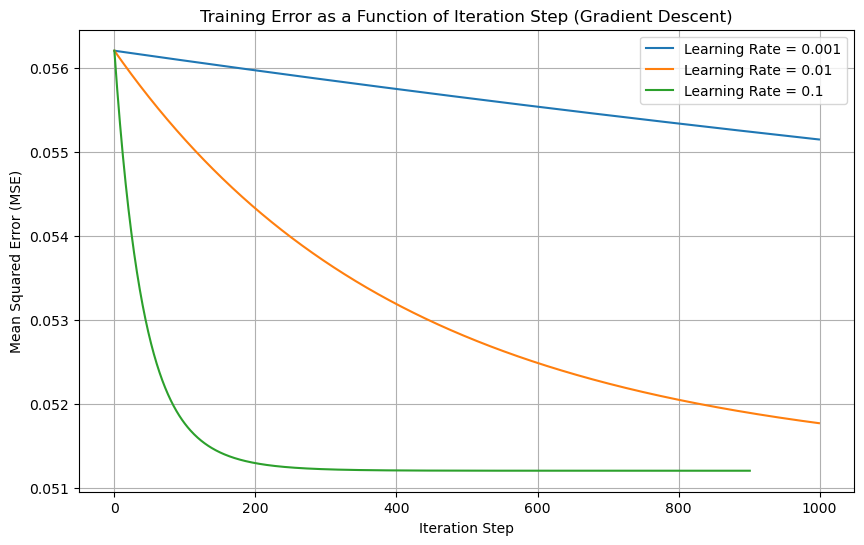

In [15]:
# Define different learning rates
learning_rates = [0.001, 0.01, 0.1]
cost_histories = {}

# Run gradient descent for each learning rate and store the cost history
for lr in learning_rates:
    _, _, cost_histories[lr] = regular_gradient_descent(X_train_data1, y_train_data1, learning_rate=lr, epochs=1000, tolerance=1e-6)

# Plot the training error (MSE) as a function of the iteration step for different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(cost_histories[lr], label=f'Learning Rate = {lr}')

plt.title('Training Error as a Function of Iteration Step (Gradient Descent)')
plt.xlabel('Iteration Step')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot that training error as a function of the iteration step using 3 different learning rates on dataset 1 while employing stochastic gradient descent.

Converged after 36 epochs.
Converged after 5 epochs.
Converged after 94 epochs.


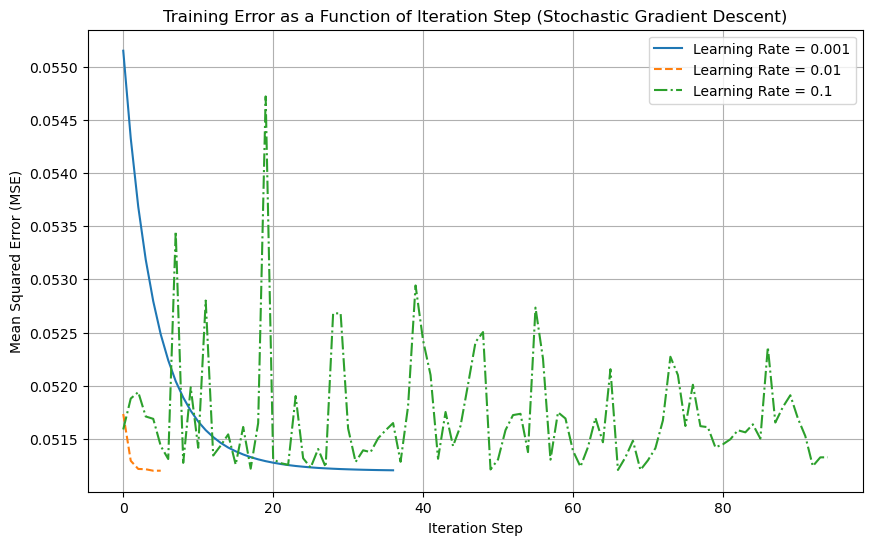

In [26]:
# Define different learning rates
learning_rates_sgd = [0.001, 0.01, 0.1]
cost_histories_sgd = {}

# Run stochastic gradient descent for each learning rate and store the cost history
for lr in learning_rates_sgd:
    _, _, cost_histories_sgd[lr] = stochastic_gradient_descent(X_train_data1, y_train_data1, learning_rate=lr, epochs=1000, tolerance=1e-6)

# Plot the training error (MSE) as a function of the iteration step for different learning rates (SGD)
line_styles = ['-', '--', '-.']

plt.figure(figsize=(10, 6))
for idx, lr in enumerate(learning_rates_sgd):
    plt.plot(cost_histories_sgd[lr], label=f'Learning Rate = {lr}', linestyle=line_styles[idx], markevery=30)

plt.title('Training Error as a Function of Iteration Step (Stochastic Gradient Descent)')
plt.xlabel('Iteration Step')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()